source: https://github.com/YanaSSS/model-stock-price-dynamics-using-SDE/blob/master/Modeling%20Stock%20Price%20Dynamics%2C%20using%20Stochastic%20Differential%20Equation.ipynb

In [1]:
# %matplotlib inline

In [2]:
# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd
# import datetime

In [3]:
# nvda_df = pd.read_csv("../datasets/NVDA.csv")
# nvda_df.head()

In [4]:
# # Convert 'Date' column to datetime
# nvda_df['Date'] = pd.to_datetime(nvda_df['Date'])

# # Set 'Date' as the index
# nvda_df.set_index('Date', inplace=True)

# #visualize the data
# nvda_df['Adj Close'].plot(label = 'Nvidia/NVDA', figsize = (16,8), color = "g")
# plt.title('Example of stock price process (Nvidia)', fontsize = 14)
# plt.xlabel('Date', fontsize = 12)
# plt.ylabel('Stock price, $', fontsize = 12)
# plt.legend(loc = 'upper left') #code for upper left positioning
# plt.show()

In [5]:
# #We will visualize two simple 1D random walks where "the walker" can move either "up or down the road". 
# #The probability to make step up or down is equal
# prob = [0.5, 0.5]

# steps = 500  
 
# #Define the random walk function with steps count and probabilities for up and down 

# def SimpleRandomWalk(N, p1, p2, color):
    
#     #statically defining the starting position
#     start = 0
#     positions = [start]
    
#     #creating random points between 0 and 1 / the steps
#     rand_p = np.random.random(steps)
    
#     #creating lists of steps for both directions
#     down_p = rand_p < prob[0]
#     up_p = rand_p > prob[1]

#     for down, up in zip(down_p, up_p): #the random walk process
#         if down == 1 and up == 0:
#             movement = -1  
#         elif down == 0 and up == 1:
#             movement = 1
#         positions.append(positions[-1] + movement) #[-1] takes the last element, since the next move depends on it
        
#     plt.plot(positions, color)
#     plt.title('Two simple 1-D Random Walks', fontsize = 14)
#     plt.xlabel('No of tries/points', fontsize = 12)
#     plt.ylabel('Range of the tries', fontsize = 12)
    
#     return None

        

# plt.figure(figsize = (16, 8))



# SimpleRandomWalk(steps, prob[0], prob[1], color = "green")

# SimpleRandomWalk(steps, prob[0], prob[1], color = "purple")
# plt.show()

In [6]:
# T = 1.        #time interval
# N = 250        #number of points


# seed = 20

# dt = T / N                 #time step
# t = np.arange(0.0, 1.0, dt)

# def BrownianMotion(seed, N):
    
#     np.random.seed(seed)

#     Z = np.random.randn(N)     #random variables
#     Z[0] = 0
    
#     dW = np.sqrt(dt)* Z        #single Brownian increment
    
#     W = np.cumsum(dW)          #Brownian path
    
#     return W

In [7]:
# W = BrownianMotion(seed, N)

# plt.figure(figsize = (16, 8))
# plt.plot(t, W, color = "green")
# plt.title('Discretized 1D Brownian Motion', fontsize = 14)
# plt.xlabel('Time $t$', fontsize = 12)
# plt.ylabel('Brownian increment $W(t)$', fontsize = 12)
# axes = plt.gca()
# axes.set_xlim([0,T])
# plt.show()

In [8]:
# #Constructing GBM

# # Parameters:
# # So - initial stock price = 56.23
# # mu - the mean of returns = 0.2
# # sigma - standard deviation of returns (volatility) = 0.45
# # W - Brownian motion/stochastic part
# # T - time horizon
# # N - number of intervals
# # We are using equation (4)

# def GBM(So, mu, sigma, W, N, t):
    
#     S = []
#     S.append(So)
          
#     for i in range(1,N):
#         drift = (mu - 0.5 * sigma**2) *t[i]       #Calculating the deterministic part
#         diffusion = sigma * W[i-1]                #Calculating the stochastic part
#         S_i = So * np.exp(drift + diffusion)
#         S.append(S_i)
        
#     return S

# So = 56.23
# mu = 0.15
# sigma = 0.6
# W = BrownianMotion(seed, N)
# N = 250     #assume 250 trading days for one year   
# T = 1.0        

# t = np.linspace(0., T, N)    #time increments

In [9]:
# #plot solution

# solution = GBM(So, mu, sigma, W, N, t)

# plt.figure(figsize = (16, 8))
# plt.plot(t, solution, color = "green")

# #plt.scatter(t, solution, color = "black")
# plt.title('Geometric Brownian Motion', fontsize = 14)
# plt.xlabel('Time $t$', fontsize = 12)
# plt.ylabel('Stock price, S', fontsize = 12)
# axes = plt.gca()
# axes.set_xlim([0,T])
# plt.show()

In [10]:
%matplotlib inline

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

/Users/vitorihaldijiran/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/vitorihaldijiran/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [12]:
# Load the dataset
nvda_df = pd.read_csv("../datasets/NVDA.csv")

# Convert 'Date' to datetime
nvda_df['Date'] = pd.to_datetime(nvda_df['Date'])

# Set 'Date' as the index
nvda_df.set_index('Date', inplace=True)

# Ensure there are no missing values in 'Adj Close'
nvda_df = nvda_df.dropna(subset=['Adj Close'])

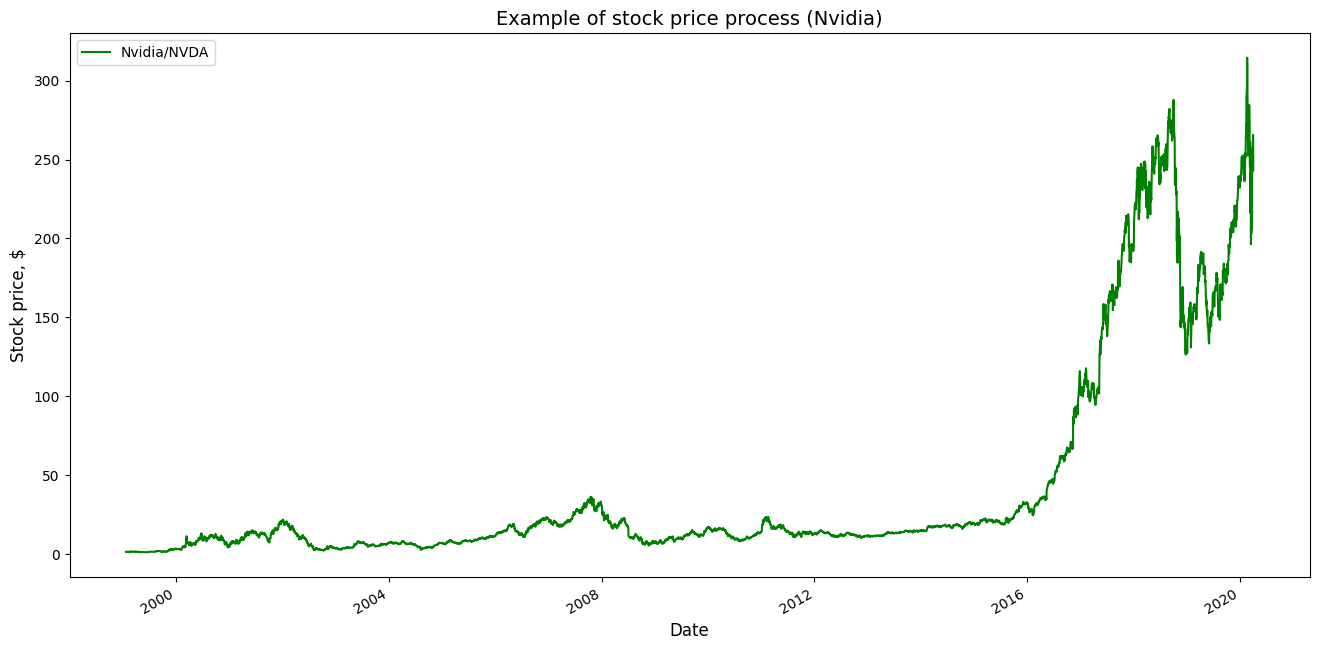

In [13]:
adj_close = nvda_df['Adj Close']
adj_close.plot(label = 'Nvidia/NVDA', figsize = (16,8), color = "g")
plt.title('Example of stock price process (Nvidia)', fontsize = 14)
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Stock price, $', fontsize = 12)
plt.legend(loc = 'upper left') 
plt.show()

In [14]:
# Reverse the 'Adj Close' prices for the calculation
adj_close = nvda_df['Adj Close'].values
adj_reversed = adj_close[::-1]

def daily_return(adj_reversed):
    returns = []
    for i in range(len(adj_reversed) - 1):
        today = adj_reversed[i + 1]
        yesterday = adj_reversed[i]
        if yesterday != 0:  # Ensure no division by zero
            daily_return = (today - yesterday) / yesterday
            returns.append(daily_return)
    return returns

returns = daily_return(adj_reversed)

# Compute the drift (mean) and diffusion (variance) coefficients and annualize it 
# by multiplying by 250 trading days
mu = np.mean(returns) * 250.            
sig = np.std(returns) * np.sqrt(250.)

print(mu)
print(sig)

-0.050142007768077125
0.6181913724199731


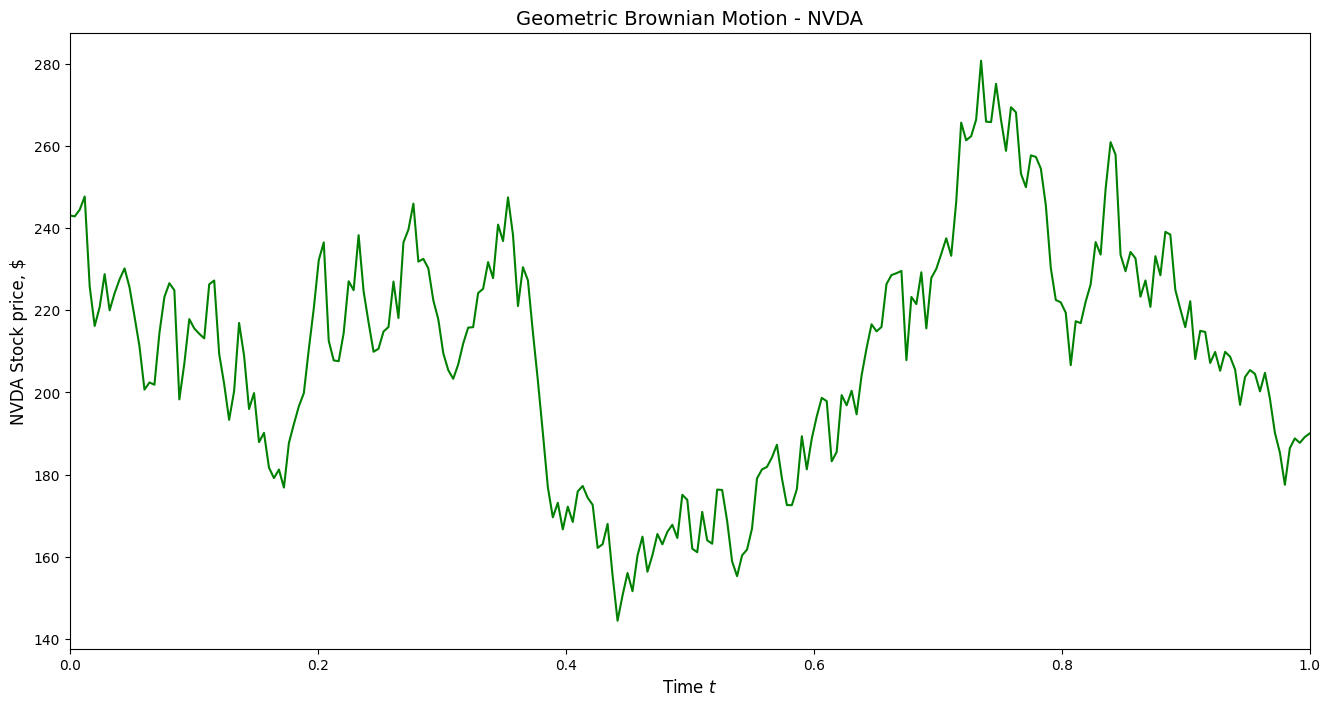

In [15]:
# GBM based on real stock prices
def GBM_Exact(So, mu, sigma, W, N, t):
    S = []
    S.append(So)
    for i in range(1, N):
        drift = (mu - 0.5 * sigma**2) * t[i]
        diffusion = sigma * W[i-1]
        S_i = So * np.exp(drift + diffusion)
        S.append(S_i)
    return S

# Parameters for Brownian motion
def BrownianMotion(seed, N):
    np.random.seed(seed)
    Z = np.random.randn(N)  # random variables
    Z[0] = 0
    dW = np.sqrt(1 / N) * Z  # single Brownian increment
    W = np.cumsum(dW)  # Brownian path
    return W

# Parameters for GBM
So = adj_reversed[0]
N = 250  # number of intervals (assumed trading days in a year)
T = 1.0
t = np.linspace(0., T, N)  # time increments
seed = 20

# Generate Brownian motion
W = BrownianMotion(seed, N)

# Generate GBM solution
solution = GBM_Exact(So, mu, sig, W, N, t)

# Plot the actual and simulated paths
plt.figure(figsize = (16, 8))
plt.plot(t, solution, color = "green")

#plt.scatter(t, solution, color = "black")
plt.title('Geometric Brownian Motion - NVDA', fontsize = 14)
plt.xlabel('Time $t$', fontsize = 12)
plt.ylabel('NVDA Stock price, $', fontsize = 12)

axes = plt.gca()
axes.set_xlim([0,T])
plt.show()

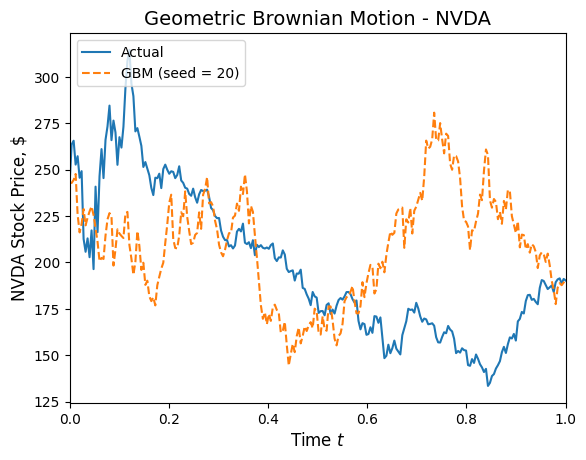

In [16]:
# Truncate adj_reversed to match the length of t
adj_reversed_truncated = adj_reversed[:N]

plt.plot(t, adj_reversed_truncated, label='Actual')
plt.plot(t, solution, label='GBM (seed = 20)', ls='--')

plt.xlabel('Time $t$', fontsize=12)
plt.ylabel('NVDA Stock Price, $', fontsize=12)
plt.title('Geometric Brownian Motion - NVDA', fontsize=14)
plt.legend(loc='upper left')
plt.xlim([0, T])
plt.show()

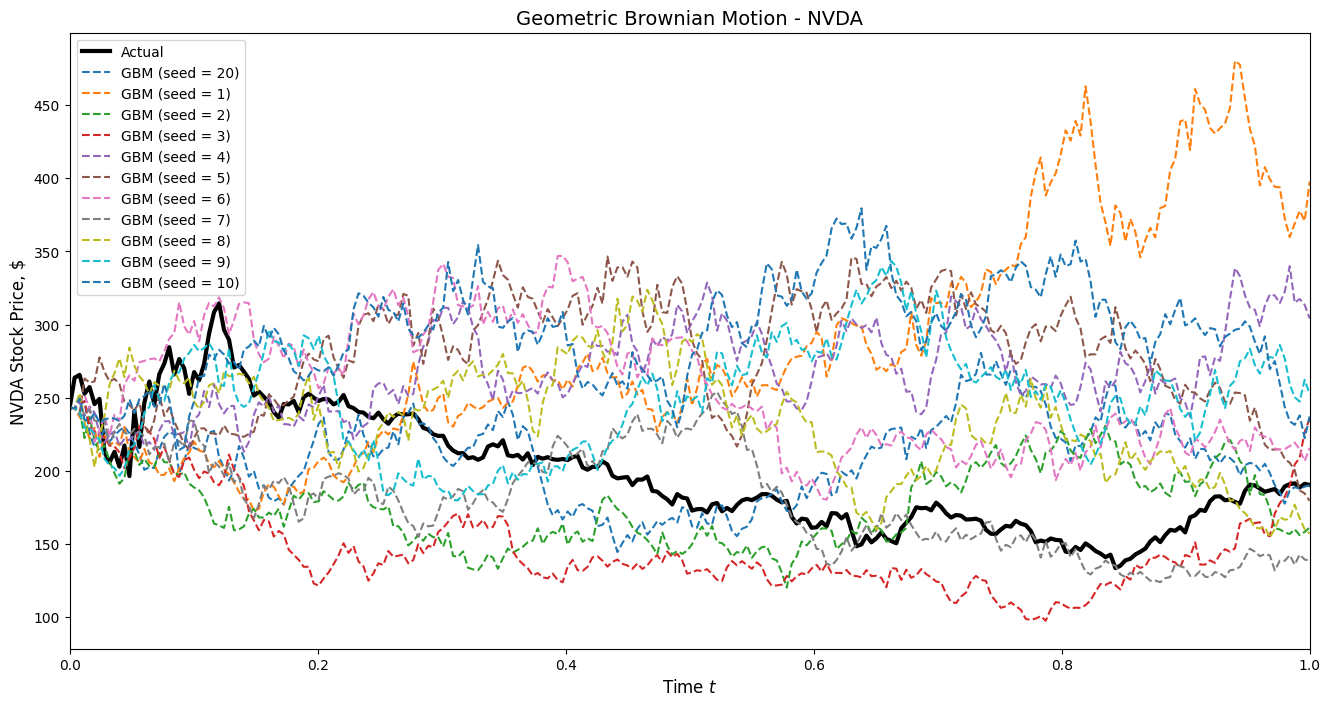

In [17]:
# Additional GBM simulations with different seeds
seed = 1
W = BrownianMotion(seed, N)
solution2 = GBM_Exact(So, mu, sig, W, N, t)

seed = 2
W = BrownianMotion(seed, N)
solution3 = GBM_Exact(So, mu, sig, W, N, t)

seed = 3
W = BrownianMotion(seed, N)
solution4 = GBM_Exact(So, mu, sig, W, N, t)

seed = 4
W = BrownianMotion(seed, N)
solution5 = GBM_Exact(So, mu, sig, W, N, t)

seed = 5
W = BrownianMotion(seed, N)
solution6 = GBM_Exact(So, mu, sig, W, N, t)

seed = 6
W = BrownianMotion(seed, N)
solution7 = GBM_Exact(So, mu, sig, W, N, t)

seed = 7
W = BrownianMotion(seed, N)
solution8 = GBM_Exact(So, mu, sig, W, N, t)

seed = 8
W = BrownianMotion(seed, N)
solution9 = GBM_Exact(So, mu, sig, W, N, t)

seed = 9
W = BrownianMotion(seed, N)
solution10 = GBM_Exact(So, mu, sig, W, N, t)

seed = 10
W = BrownianMotion(seed, N)
solution11 = GBM_Exact(So, mu, sig, W, N, t)

# Plot all GBM solutions with the actual stock price
plt.figure(figsize=(16, 8))

plt.plot(t, adj_reversed_truncated, label='Actual', linewidth=3, color="black")
plt.plot(t, solution, label='GBM (seed = 20)', ls='--')
plt.plot(t, solution2, label='GBM (seed = 1)', ls='--')
plt.plot(t, solution3, label='GBM (seed = 2)', ls='--')
plt.plot(t, solution4, label='GBM (seed = 3)', ls='--')
plt.plot(t, solution5, label='GBM (seed = 4)', ls='--')
plt.plot(t, solution6, label='GBM (seed = 5)', ls='--')
plt.plot(t, solution7, label='GBM (seed = 6)', ls='--')
plt.plot(t, solution8, label='GBM (seed = 7)', ls='--')
plt.plot(t, solution9, label='GBM (seed = 8)', ls='--')
plt.plot(t, solution10, label='GBM (seed = 9)', ls='--')
plt.plot(t, solution11, label='GBM (seed = 10)', ls='--')

plt.xlabel('Time $t$', fontsize=12)
plt.ylabel('NVDA Stock Price, $', fontsize=12)
plt.title('Geometric Brownian Motion - NVDA', fontsize=14)

plt.legend(loc='upper left')
plt.xlim([0, 1])
plt.show()

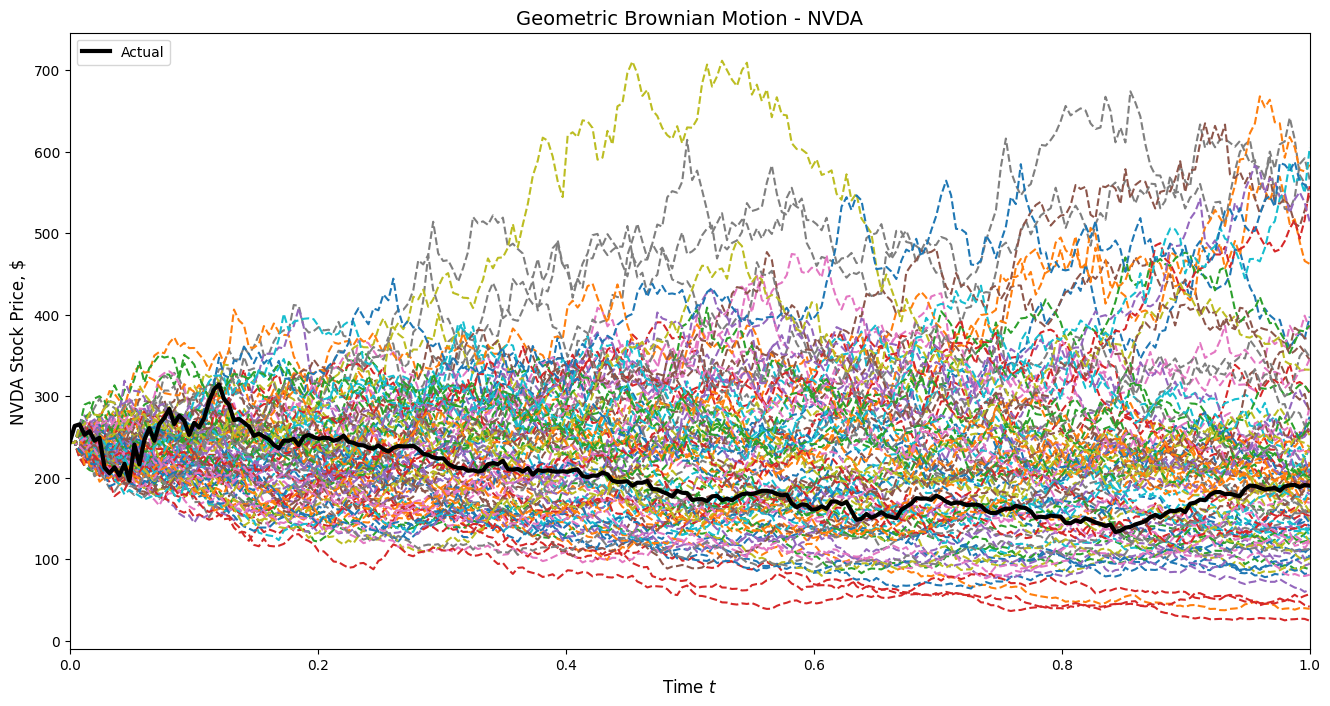

In [18]:
# Parameters for GBM
T = 1.0
N = 250
So = adj_reversed[0]
t = np.linspace(0., T, N)  # time increments

# Plot all GBM solutions with the actual stock price
plt.figure(figsize=(16, 8))

for seed in range(1, 100):
    W = BrownianMotion(seed, N)
    solution = GBM_Exact(So, mu, sig, W, N, t)
    plt.plot(t, solution, ls='--')

# Truncate adj_reversed to match the length of t
adj_reversed_truncated = adj_reversed[:N]

plt.plot(t, adj_reversed_truncated, label='Actual', color="black", linewidth=3)
plt.xlabel('Time $t$', fontsize=12)
plt.ylabel('NVDA Stock Price, $', fontsize=12)
plt.title('Geometric Brownian Motion - NVDA', fontsize=14)

plt.legend(loc='upper left')
plt.xlim([0, T])
plt.show()

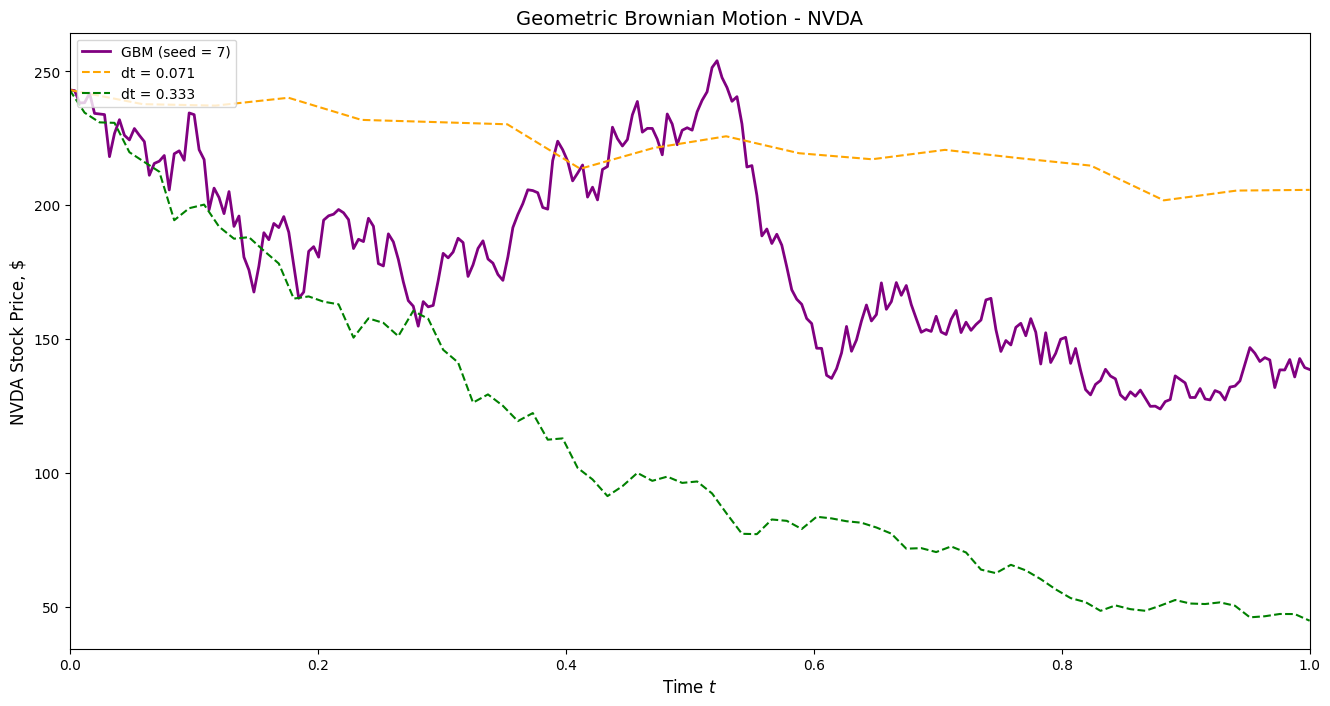

In [21]:
# GBM - NDA
T = 1.0
N = 250
So = adj_reversed[0]

seed = 7
W = BrownianMotion(seed, N)
t = np.linspace(0., 1., N)  # time increments
solution = GBM_Exact(So, mu, sig, W, N, t)  # exact solution

plt.figure(figsize=(16, 8))
plt.plot(t, solution, label='GBM (seed = 7)', color="purple", linewidth=2)

# Euler-Maruyama Approximation
def Em(So, mu, sigma, b, T, N, TS):
    dt = T / TS  # EM step size
    L = N // TS  # intervals according to the TS
    wi = []
    wi.append(So)
    for i in range(1, int(L)+1):
        delta_Wi = b[i] - b[i-1]
        wi_new = wi[i-1] + mu * wi[i-1] * dt + sigma * wi[i-1] * delta_Wi
        wi.append(wi_new)
    return wi, dt

# Different time step sizes
b = BrownianMotion(seed, N)
TS = 14
L = N // TS
Approx_1, dt_1 = Em(So, mu, sig, b, T, N, TS)
time_Em_1 = np.linspace(0., 1., int(L)+1)  # time increments for EM approximation

b = BrownianMotion(seed, N)
TS = 3
L = N // TS
Approx_2, dt_2 = Em(So, mu, sig, b, T, N, TS)
time_Em_2 = np.linspace(0., 1., int(L)+1)  # time increments for EM approximation

plt.plot(time_Em_1, Approx_1, label='dt = {:.3f}'.format(dt_1), color="orange", ls='--')
plt.plot(time_Em_2, Approx_2, label='dt = {:.3f}'.format(dt_2), color="green", ls='--')

plt.xlabel('Time $t$', fontsize=12)
plt.ylabel('NVDA Stock Price, $', fontsize=12)
plt.title('Geometric Brownian Motion - NVDA', fontsize=14)

plt.legend(loc='upper left')
axes = plt.gca()
axes.set_xlim([0, T])
plt.show()